# Univariate Linear Regression
Ta có công thức
$f_{w, b} = w.x + b$

### Tạo dummy data

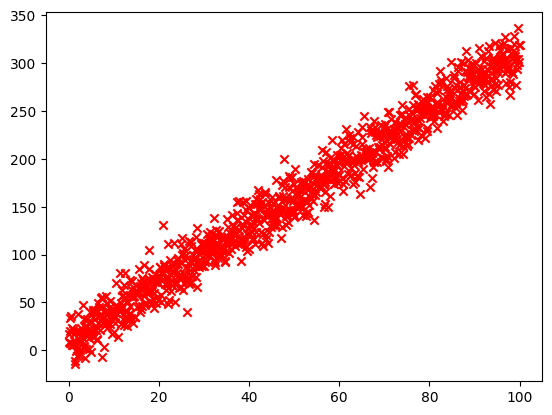

In [ ]:
# Dữ liệu cho univariate linear regression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Thiết lập seed để đảm bảo kết quả có thể tái tạo
np.random.seed(42)

# Tạo 1000 điểm dữ liệu
n_samples = 1000

# Tạo biến độc lập x (giá trị từ 0 đến 100)
x = np.linspace(0, 100, n_samples)

# Tạo biến phụ thuộc y với mối quan hệ tuyến tính: y = 3x + 10 + nhiễu
slope = 3
intercept = 10
noise = np.random.normal(0, 15, n_samples)  # Nhiễu ngẫu nhiên với độ lệch chuẩn 15
y = slope * x + intercept + noise

plt.scatter(x, y, marker='x', c='r')
plt.show()

In [ ]:
# Chia dữ liệu
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

### Tạo mô hình và huấn luyện

Sử dụng Gradient Descent

Thời gian huấn luyện: 0.0009179115295410156
Weight cuối cùng: 3.1513
Bias cuối cùng: 0.0549


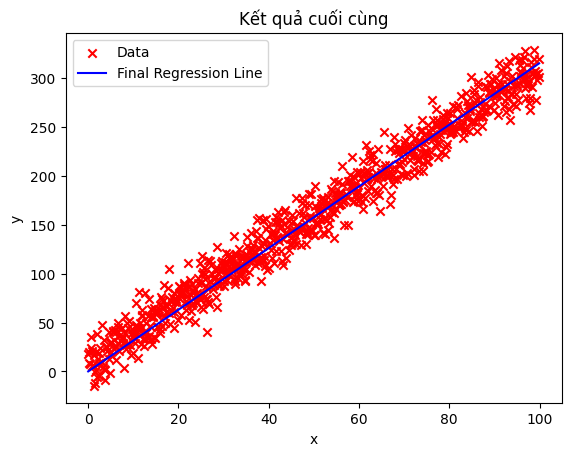

In [ ]:
import time

def predict(x, weight, bias):
    """Tính giá trị dự đoán y = wx + b"""
    return weight * x + bias

def compute_gradients(x, y, weight, bias):
    """Tính gradient cho weight và bias"""
    predictions = predict(x, weight, bias)
    errors = predictions - y
    dw = np.mean(errors * x)  # Gradient cho weight
    db = np.mean(errors)      # Gradient cho bias
    return dw, db

def train_linear_regression(x, y, learning_rate=0.0001, epochs=30):
    """
    Huấn luyện mô hình hồi quy tuyến tính sử dụng gradient descent
    Args:
        x: numpy array, biến độc lập
        y: numpy array, biến phụ thuộc
        learning_rate: tốc độ học
        eras: số vòng lặp huấn luyện
        plot_interval: tần suất vẽ đồ thị
    Returns:
        weight, bias: tham số mô hình đã huấn luyện
    """
    # Khởi tạo tham số
    weight = 0.0
    bias = 0.0

    # Kiểm tra đầu vào
    if len(x) != len(y):
        raise ValueError("Kích thước của x và y phải bằng nhau")
    if len(x) == 0:
        raise ValueError("Dữ liệu đầu vào rỗng")

    # Huấn luyện mô hình
    for epoch in range(epochs):
        # Tính gradient
        dw, db = compute_gradients(x, y, weight, bias)

        # Cập nhật tham số
        weight -= learning_rate * dw
        bias -= learning_rate * db

    return weight, bias

try:
    st = time.time()
    # Huấn luyện mô hình
    final_weight, final_bias = train_linear_regression(x_train, y_train)
    ed = time.time()
    print(f"Thời gian huấn luyện: {ed-st}")
    print(f"Weight cuối cùng: {final_weight:.4f}")
    print(f"Bias cuối cùng: {final_bias:.4f}")

    # Vẽ đồ thị cuối cùng
    plt.clf()
    plt.scatter(x_train, y_train, marker='x', c='red', label='Data')
    x_line = np.array([min(x_train), max(x_train)])
    y_line = predict(x_line, final_weight, final_bias)
    plt.plot(x_line, y_line, c='blue', label='Final Regression Line')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Kết quả cuối cùng')
    plt.legend()
    plt.show()
except Exception as e:
    print(f"Lỗi trong quá trình huấn luyện: {str(e)}")

In [ ]:
# test mô hình
y_pred = predict(x_test, final_weight, final_bias)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 271.57022051236953


Sử dụng Mini-Batch Gradient Descent

Thời gian huấn luyện (Batch GD): 0.00614166259765625
Weight cuối cùng (Batch GD): 3.1234
Bias cuối cùng (Batch GD): 0.1412


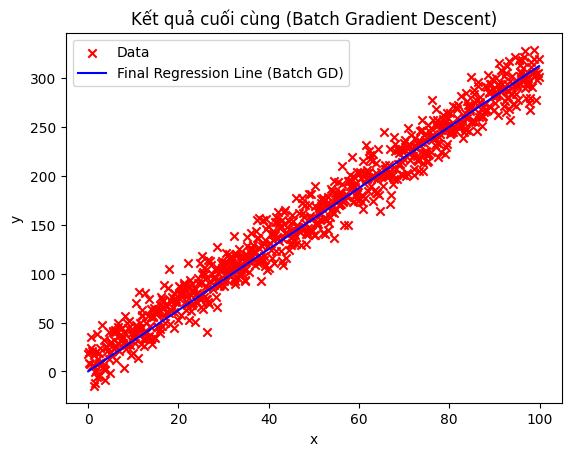

In [ ]:
def train_batch_linear_regression(x, y, learning_rate=0.0001, epochs=30, batch_size=32):
    """
    Huấn luyện mô hình hồi quy tuyến tính sử dụng Batch Gradient Descent
    Args:
        x: numpy array, biến độc lập
        y: numpy array, biến phụ thuộc
        learning_rate: tốc độ học
        epochs: số vòng lặp huấn luyện
        batch_size: kích thước batch
        plot_interval: tần suất vẽ đồ thị
    Returns:
        weight, bias: tham số mô hình đã huấn luyện
    """
    # Khởi tạo tham số
    weight = 0.0
    bias = 0.0

    n_samples = len(x)

    # Huấn luyện mô hình
    for epoch in range(epochs):
        # Chia dữ liệu thành các batch
        for i in range(0, n_samples, batch_size):
            x_batch = x[i:i + batch_size]
            y_batch = y[i:i + batch_size]

            # Tính gradient trên batch
            dw, db = compute_gradients(x_batch, y_batch, weight, bias)

            # Cập nhật tham số
            weight -= learning_rate * dw
            bias -= learning_rate * db

    return weight, bias

try:
    st = time.time()
    final_weight_batch, final_bias_batch = train_batch_linear_regression(x_train, y_train, epochs=30, batch_size=64)
    ed = time.time()
    print(f"Thời gian huấn luyện (Batch GD): {ed-st}")
    print(f"Weight cuối cùng (Batch GD): {final_weight_batch:.4f}")
    print(f"Bias cuối cùng (Batch GD): {final_bias_batch:.4f}")

    # Vẽ đồ thị cuối cùng
    plt.clf()
    plt.scatter(x_train, y_train, marker='x', c='red', label='Data')
    x_line = np.array([min(x_train), max(x_train)])
    y_line = predict(x_line, final_weight_batch, final_bias_batch)
    plt.plot(x_line, y_line, c='blue', label='Final Regression Line (Batch GD)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Kết quả cuối cùng (Batch Gradient Descent)')
    plt.legend()
    plt.show()
except Exception as e:
    print(f"Lỗi trong quá trình huấn luyện (Batch GD): {str(e)}")

In [ ]:
# test mô hình
y_pred = predict(x_test, final_weight, final_bias)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 271.57022051236953
